In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [99]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders_prior = pd.read_csv('order_products__prior.csv')
orders_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [100]:
# Detecting missing values
print(aisles.isnull().sum())
print(departments.isnull().sum())
print(products.isnull().sum())
print(orders.isnull().sum())
print(orders_train.isnull().sum())
print(orders_prior.isnull().sum())

aisle_id    0
aisle       0
dtype: int64
department_id    0
department       0
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [101]:
# Replacing NaN with zero
print(orders.isnull().sum())
orders.days_since_prior_order.fillna(value=0, inplace=True)
print(orders.isnull().sum())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [102]:
# no duplicates
dataframes = [aisles, departments, products, orders, orders_prior, orders_train]

for dataframe in dataframes:
    print(dataframe.duplicated().sum())

0
0
0
0
0
0


In [103]:
# join dataframes
products_combined = pd.merge(pd.merge(products, departments),aisles)

# combine orders and orders_prior dataframes
orders_combined_1 = pd.merge(orders, orders_prior, on = 'order_id', how = 'inner')

# combine orders and orders_train dataframes
orders_combined_2 = pd.merge(orders, orders_train, on = 'order_id', how = 'inner')

# combine orders and products combined -- get the labels
prioralldata = pd.merge(orders_combined_1, products_combined, on = 'product_id', how = 'inner')

In [104]:
prioralldata.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,beverages,soft drinks
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,beverages,soft drinks


In [105]:
#drop categorical data, only numerical data can go into machine learning algorithms
prioralldata.drop(['eval_set','product_name','department','aisle'], axis=1, inplace=True)
prioralldata.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,2539329,1,1,2,8,0.0,196,1,0,77,7
1,2398795,1,2,3,7,15.0,196,1,1,77,7


In [106]:
prioralldata.shape

(32434489, 11)

In [107]:
pd.value_counts(prioralldata['reordered'], normalize=True)

1    0.589697
0    0.410303
Name: reordered, dtype: float64

# Sampling the data due to computing restraints (n = 1000)

In [108]:
n = 1000

In [109]:
priorall = prioralldata.sample(n)

In [110]:
pd.value_counts(priorall['reordered'], normalize = True)

1    0.617
0    0.383
Name: reordered, dtype: float64

In [111]:
X = priorall.drop('reordered', axis=1).values
y = priorall['reordered'].values

print('X shape:',X.shape)
print('y shape:', y.shape)

# Splitting the data
from sklearn.model_selection import train_test_split
from datetime import datetime

start_time1 = datetime.now()
# Due to computing constraints we have to reduce the data
#X_to_use, X_not_used, y_to_use, y_not_used = train_test_split(X, y,train_size=0.2,test_size=0.8)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2)

# checking the shapes
#print('X_to_use:', X_to_use.shape, X_to_use.dtype)
#print('y_to_use:', y_to_use.shape, y_to_use.dtype)
print('X_train:', X_train.shape, X_train.dtype)
print('y_train:', y_train.shape, y_train.dtype)
print('X_test:', X_test.shape, X_test.dtype)
print('y_test:', y_test.shape, y_test.dtype)

# Split again into validation/test sets

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    test_size=0.1, random_state=0
)

end_time1 = datetime.now()

print('Train:', X_train.shape, y_train.shape)
print('Validation:', X_valid.shape, y_valid.shape)
print('Test:', X_test.shape, y_test.shape)


print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))


X shape: (1000, 10)
y shape: (1000,)
X_train: (800, 10) float64
y_train: (800,) int64
X_test: (200, 10) float64
y_test: (200,) int64
Train: (800, 10) (800,)
Validation: (180, 10) (180,)
Test: (20, 10) (20,)

Time to run in seconds 0.019309



# Baseline

In [112]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class reorder(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.ones((len(X),1), dtype=bool)

start_time1 = datetime.now()
reorder_clf = reorder()
end_time1 = datetime.now()
print ('Accuracy: {:.3f}'.format(cross_val_score(reorder_clf, X_train, y_train, cv=3, scoring = 'accuracy').sum()/3))
print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))

Accuracy: 0.615

Time to run in seconds 0.00014



In [113]:
results_summary = []
results_summary.append({
            '_model': 'Baseline',
            'accuracy': cross_val_score(reorder_clf, X_train, y_train, cv=3, scoring = 'accuracy').sum()/3,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_1000 = pd.DataFrame(results_summary)

In [114]:
accuracy_df_1000

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140


# Stochastic Gradient Classifier

In [115]:
from sklearn.linear_model import SGDClassifier

start_time1 = datetime.now()

# Create the estimator
sgd_clf = SGDClassifier(random_state=42)

# Fit the model to train data
sgd_clf.fit(X_train, y_train)

# Accuracy on test set
accuracy_sgd = sgd_clf.score(X_test, y_test)

end_time1 = datetime.now()
print('Accuracy: {:.3f}'.format(accuracy_sgd))
print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))

Accuracy: 0.200

Time to run in seconds 0.010032



In [116]:
results_summary.append({
            '_model': 'SGD',
            'accuracy': accuracy_sgd,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_1000 = pd.DataFrame(results_summary)
accuracy_df_1000

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140
1,SGD,0.200000,1000,00:00:00.010032


# K-Nearest Neighbours

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the StandardScaler
scaler = StandardScaler()

# Create k-NN classifier
knn = KNeighborsClassifier(algorithm='brute')


# Create the pipeline
pipe = Pipeline([('scaler', scaler),
                 ('knn', knn)])


pipe.fit(X_train, y_train)

# Evaluate on validation set
accuracy_knn = pipe.score(X_test, y_test)

# Print accuracy
print('k-nearest neighbors accuracy: {:.3f}'.format(accuracy_knn))

k-nearest neighbors accuracy: 0.700


Tuning **k** and **distance metric (L1 and L2)** using Grid Search

In [118]:

# Define a set of reasonable values
k_values = np.arange(5, 105, 5)
distance_types = [1,2]

# Save accuracy on validation set
test_scores = []

# Grid search
for k in k_values:
    for d in distance_types:
        # Set hyperparameters
        pipe.set_params(knn__n_neighbors = k, knn__p = d)
        
        # Fit a k-NN classifier
        pipe.fit(X_train, y_train)
        
        # Evaluate on test set
        accuracy = pipe.score(X_test, y_test)
        
        # Save accuracy
        test_scores.append({
            'n neighbors': k,
            'distance metric': d,
            'test accuracy': accuracy
        })
        
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='test accuracy', ascending=False).head()

,distance metric,n neighbors,test accuracy
10,1,30,0.85
23,2,60,0.80
15,2,40,0.80
27,2,70,0.80
12,1,35,0.80


In [119]:
start_time1 = datetime.now()

# tuned KNN model
pipe.set_params(knn__n_neighbors = 100, knn__p = 1)

# Fit a k-NN classifier
pipe.fit(X_train, y_train)

# Evaluate on test set
accuracy_knn = pipe.score(X_test, y_test)

end_time1 = datetime.now()
accuracy_knn

0.75

In [120]:
results_summary.append({
            '_model': 'KNN',
            'accuracy': accuracy_knn,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_1000 = pd.DataFrame(results_summary)
accuracy_df_1000

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140
1,SGD,0.200000,1000,00:00:00.010032
2,KNN,0.750000,1000,00:00:00.006132


# Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

# Create the estimator
logreg = LogisticRegression()

# Fit the model to train data
logreg.fit(X_train, y_train)

# Accuracy on test set
accuracy_logreg = logreg.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_logreg))

Accuracy: 0.800


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

start_time1 = datetime.now()

# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('logreg',LogisticRegression())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'logreg__C':[0.0001,0.1,1000],
    'logreg__solver':['saga']
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

end_time1 = datetime.now()


In [123]:
df = pd.DataFrame.from_items([
    ('alpha',grid_cv.cv_results_['param_logreg__C']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,alpha,mean accuracy,standard deviation
1,0.1,0.6675,0.015159
2,1000,0.6650,0.013899
0,0.0001,0.6150,0.001088


In [124]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.6675  (std: 0.015158880204899266 ) with alpha: 0.1


In [125]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

accuracy_logreg = grid_cv.score(X_test,y_test)

print('Logistic regression accuracy (test set):',accuracy)

Logistic regression accuracy (test set): 0.75


In [126]:
results_summary.append({
            '_model': 'Logistic Regression',
            'accuracy': accuracy_logreg,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_1000 = pd.DataFrame(results_summary)
accuracy_df_1000

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140
1,SGD,0.200000,1000,00:00:00.010032
2,KNN,0.750000,1000,00:00:00.006132
3,Logistic Regression,0.750000,1000,00:00:00.108472


# Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)

# Fit the model to train data
dt.fit(X_train, y_train)

# Get score
accuracy_dt = dt.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt))

Accuracy: 0.850


In [128]:
# Increasing depth
dt_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# Fit the model to train data
dt_2.fit(X_train, y_train)

# Get score
accuracy_dt_2 = dt_2.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_2))

Accuracy: 0.850


In [129]:
# Increasing depth
dt_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model to train data
dt_3.fit(X_train, y_train)

# Get score
accuracy_dt_3 = dt_3.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_3))

Accuracy: 0.850


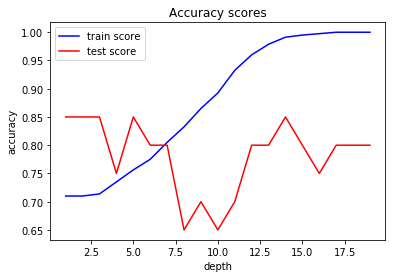

In [130]:
start_time1 = datetime.now()

# Define a set of reasonable values
depth_values = np.arange(1,20,1)

# Save accuracy on validation set
train_scores = []
test_scores = []

# Grid search
for depth in depth_values:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    dt.fit(X_train,y_train)
    
    # Accuracy
    accuracy_train = dt.score(X_train,y_train)
    accuracy_test = dt.score(X_test,y_test)
    
    
    # Save train accuracy
    train_scores.append({
        'depth': depth,
        'accuracy': accuracy_train
    })

    
    # Save test accuracy
    test_scores.append({
        'depth': depth,
        'accuracy': accuracy_test
    })


# Create DataFrame with train scores
train_scores_df = pd.DataFrame(train_scores)    
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)

end_time1 = datetime.now()

# Plot train and validation curve
plt.plot(train_scores_df['depth'],train_scores_df['accuracy'], color='blue',label='train score')
plt.plot(test_scores_df['depth'],test_scores_df['accuracy'], color='red',label='test score')
plt.title('Accuracy scores')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [131]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[0],
      ' with depth:',idx_max[1])

Top accuracy on test set: 0.85  with depth: 1.0


In [132]:
results_summary.append({
            '_model': 'Decision Tree',
            'accuracy': idx_max[0],
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_1000 = pd.DataFrame(results_summary)
accuracy_df_1000

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140
1,SGD,0.200000,1000,00:00:00.010032
2,KNN,0.750000,1000,00:00:00.006132
3,Logistic Regression,0.750000,1000,00:00:00.108472
4,Decision Tree,0.850000,1000,00:00:00.107971


# Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Create a decision tree
rf_1 = RandomForestClassifier(
    n_estimators=1, max_depth=5 , random_state=0)

# Fit estimator
rf_1.fit(X_train, y_train)

# Get score
accuracy_rf_1 = rf_1.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_1))

Accuracy: 0.700


In [134]:
# Create a random forest estimator
rf_10 = RandomForestClassifier(
    n_estimators=10, max_depth=None , random_state=0)

# Fit estimator
rf_10.fit(X_train, y_train)

# Get score
accuracy_rf_10 = rf_10.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_10))

Accuracy: 0.650


In [135]:
# Create a large random forest estimator
rf_200 = RandomForestClassifier(
    n_estimators=200, max_depth=None , random_state=0)

# Fit estimator
rf_200.fit(X_train, y_train)

# Get score
accuracy_rf_200 = rf_200.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_200))

Accuracy: 0.750


In [136]:
# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('randomforest',RandomForestClassifier())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'randomforest__n_estimators':[1,10,100,1000],
    'randomforest__max_depth':[None],
    'randomforest__random_state':[0]
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', None), ('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
           ..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True)], 'randomforest__n_estimators': [1, 10, 100, 1000], 'randomforest__max_depth': [None], 'randomforest__random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [137]:
df = pd.DataFrame.from_items([
    ('n_estimators',grid_cv.cv_results_['param_randomforest__n_estimators']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,n_estimators,mean accuracy,standard deviation
3,1000,0.69375,0.012229
2,100,0.69250,0.017908
0,1,0.64625,0.034886
1,10,0.63875,0.032985


In [138]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.69375  (std: 0.01222941664513832 ) with alpha: 1000


In [139]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

accuracy = grid_cv.score(X_test,y_test)

print('Random Forest Classifier accuracy (test set):',accuracy)

Random Forest Classifier accuracy (test set): 0.75


In [140]:
start_time1 = datetime.now()
# Define a set of reasonable values
n_trees = np.arange(50,401,50)

# Save accuracy on test set

test_scores = []

# Grid search
for ensemble in n_trees:
    rf = RandomForestClassifier(n_estimators=ensemble, max_depth=None, random_state=0 )
    rf.fit(X_train,y_train)
    
    # Accuracy
    accuracy_test = rf.score(X_test,y_test)
    
    # Save validation accuracy
    test_scores.append({
        'n estimators': ensemble,
        'test accuracy': accuracy_test
    })
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)
end_time1 = datetime.now()

test_scores_df.head(10)

,n estimators,test accuracy
0,50,0.70
1,100,0.75
2,150,0.75
3,200,0.75
4,250,0.75
5,300,0.75
6,350,0.75
7,400,0.75


In [141]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['test accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[1],
      ' with n estimators:',idx_max[0])

Top accuracy on test set: 0.75  with n estimators: 100.0


In [142]:
# Fitting the tuned estimators on the entire train set
rf = RandomForestClassifier(n_estimators=int(idx_max[0]), max_depth=None, random_state=0 )
rf.fit(X_train,y_train)
accuracy_rf = rf.score(X_test, y_test)

In [143]:
results_summary.append({
            '_model': 'Random Forest',
            'accuracy': accuracy_rf,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_1000 = pd.DataFrame(results_summary)
accuracy_df_1000

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140
1,SGD,0.200000,1000,00:00:00.010032
2,KNN,0.750000,1000,00:00:00.006132
3,Logistic Regression,0.750000,1000,00:00:00.108472
4,Decision Tree,0.850000,1000,00:00:00.107971
5,Random Forest,0.750000,1000,00:00:04.798598


# Summary with n=1000

In [144]:
accuracy_df_1000

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140
1,SGD,0.200000,1000,00:00:00.010032
2,KNN,0.750000,1000,00:00:00.006132
3,Logistic Regression,0.750000,1000,00:00:00.108472
4,Decision Tree,0.850000,1000,00:00:00.107971
5,Random Forest,0.750000,1000,00:00:04.798598


# Sample with n=10000

# Sampling the data due to computing restraints (n = 10000)

In [145]:
n = 10000

In [146]:
priorall = prioralldata.sample(n)

In [147]:
pd.value_counts(priorall['reordered'], normalize = True)

1    0.5847
0    0.4153
Name: reordered, dtype: float64

In [148]:
X = priorall.drop('reordered', axis=1).values
y = priorall['reordered'].values

print('X shape:',X.shape)
print('y shape:', y.shape)

# Splitting the data
from sklearn.model_selection import train_test_split
from datetime import datetime

start_time1 = datetime.now()
# Due to computing constraints we have to reduce the data
#X_to_use, X_not_used, y_to_use, y_not_used = train_test_split(X, y,train_size=0.2,test_size=0.8)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2)

# checking the shapes
#print('X_to_use:', X_to_use.shape, X_to_use.dtype)
#print('y_to_use:', y_to_use.shape, y_to_use.dtype)
print('X_train:', X_train.shape, X_train.dtype)
print('y_train:', y_train.shape, y_train.dtype)
print('X_test:', X_test.shape, X_test.dtype)
print('y_test:', y_test.shape, y_test.dtype)

# Split again into validation/test sets

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    test_size=0.1, random_state=0
)

end_time1 = datetime.now()

print('Train:', X_train.shape, y_train.shape)
print('Validation:', X_valid.shape, y_valid.shape)
print('Test:', X_test.shape, y_test.shape)


print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))


X shape: (10000, 10)
y shape: (10000,)
X_train: (8000, 10) float64
y_train: (8000,) int64
X_test: (2000, 10) float64
y_test: (2000,) int64
Train: (8000, 10) (8000,)
Validation: (1800, 10) (1800,)
Test: (200, 10) (200,)

Time to run in seconds 0.012391



# Baseline

In [149]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class reorder(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.ones((len(X),1), dtype=bool)

start_time1 = datetime.now()
reorder_clf = reorder()
end_time1 = datetime.now()
print ('Accuracy: {:.3f}'.format(cross_val_score(reorder_clf, X_train, y_train, cv=3, scoring = 'accuracy').sum()/3))
print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))

Accuracy: 0.585

Time to run in seconds 5.2e-05



In [150]:
results_summary = []
results_summary.append({
            '_model': 'Baseline',
            'accuracy': cross_val_score(reorder_clf, X_train, y_train, cv=3, scoring = 'accuracy').sum()/3,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_10000 = pd.DataFrame(results_summary)

In [151]:
accuracy_df_10000

,_model,accuracy,sample,time to run
0,Baseline,0.584874,10000,00:00:00.000052


# Stochastic Gradient Classifier

In [152]:
from sklearn.linear_model import SGDClassifier

start_time1 = datetime.now()

# Create the estimator
sgd_clf = SGDClassifier(random_state=42)

# Fit the model to train data
sgd_clf.fit(X_train, y_train)

# Accuracy on test set
accuracy_sgd = sgd_clf.score(X_test, y_test)

end_time1 = datetime.now()
print('Accuracy: {:.3f}'.format(accuracy_sgd))
print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))

Accuracy: 0.630

Time to run in seconds 0.007604



In [153]:
results_summary.append({
            '_model': 'SGD',
            'accuracy': accuracy_sgd,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_10000 = pd.DataFrame(results_summary)
accuracy_df_10000

,_model,accuracy,sample,time to run
0,Baseline,0.584874,10000,00:00:00.000052
1,SGD,0.630000,10000,00:00:00.007604


# K-Nearest Neighbours

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the StandardScaler
scaler = StandardScaler()

# Create k-NN classifier
knn = KNeighborsClassifier(algorithm='brute')


# Create the pipeline
pipe = Pipeline([('scaler', scaler),
                 ('knn', knn)])


pipe.fit(X_train, y_train)

# Evaluate on validation set
accuracy_knn = pipe.score(X_test, y_test)

# Print accuracy
print('k-nearest neighbors accuracy: {:.3f}'.format(accuracy_knn))

k-nearest neighbors accuracy: 0.615


Tuning **k** and **distance metric (L1 and L2)** using Grid Search

In [155]:

# Define a set of reasonable values
k_values = np.arange(5, 105, 5)
distance_types = [1,2]

# Save accuracy on validation set
test_scores = []

# Grid search
for k in k_values:
    for d in distance_types:
        # Set hyperparameters
        pipe.set_params(knn__n_neighbors = k, knn__p = d)
        
        # Fit a k-NN classifier
        pipe.fit(X_train, y_train)
        
        # Evaluate on test set
        accuracy = pipe.score(X_test, y_test)
        
        # Save accuracy
        test_scores.append({
            'n neighbors': k,
            'distance metric': d,
            'test accuracy': accuracy
        })
        
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='test accuracy', ascending=False).head()

,distance metric,n neighbors,test accuracy
18,1,50,0.725
22,1,60,0.715
20,1,55,0.715
15,2,40,0.700
8,1,25,0.695


In [156]:
start_time1 = datetime.now()

# tuned KNN model
pipe.set_params(knn__n_neighbors = 100, knn__p = 1)

# Fit a k-NN classifier
pipe.fit(X_train, y_train)

# Evaluate on test set
accuracy_knn = pipe.score(X_test, y_test)

end_time1 = datetime.now()
accuracy_knn

0.69

In [157]:
results_summary.append({
            '_model': 'KNN',
            'accuracy': accuracy_knn,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_10000 = pd.DataFrame(results_summary)
accuracy_df_10000

,_model,accuracy,sample,time to run
0,Baseline,0.584874,10000,00:00:00.000052
1,SGD,0.630000,10000,00:00:00.007604
2,KNN,0.690000,10000,00:00:00.057443


# Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

# Create the estimator
logreg = LogisticRegression()

# Fit the model to train data
logreg.fit(X_train, y_train)

# Accuracy on test set
accuracy_logreg = logreg.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_logreg))

Accuracy: 0.630


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

start_time1 = datetime.now()

# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('logreg',LogisticRegression())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'logreg__C':[0.0001,0.1,1000],
    'logreg__solver':['saga']
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

end_time1 = datetime.now()


In [160]:
df = pd.DataFrame.from_items([
    ('alpha',grid_cv.cv_results_['param_logreg__C']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,alpha,mean accuracy,standard deviation
1,0.1,0.681250,0.008879
2,1000,0.680875,0.008891
0,0.0001,0.584875,0.000073


In [161]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.68125  (std: 0.008879024226168554 ) with alpha: 0.1


In [162]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

accuracy_logreg = grid_cv.score(X_test,y_test)

print('Logistic regression accuracy (test set):',accuracy)

Logistic regression accuracy (test set): 0.67


In [163]:
results_summary.append({
            '_model': 'Logistic Regression',
            'accuracy': accuracy_logreg,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_10000 = pd.DataFrame(results_summary)
accuracy_df_10000

,_model,accuracy,sample,time to run
0,Baseline,0.584874,10000,00:00:00.000052
1,SGD,0.630000,10000,00:00:00.007604
2,KNN,0.690000,10000,00:00:00.057443
3,Logistic Regression,0.690000,10000,00:00:00.392436


# Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)

# Fit the model to train data
dt.fit(X_train, y_train)

# Get score
accuracy_dt = dt.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt))

Accuracy: 0.695


In [165]:
# Increasing depth
dt_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# Fit the model to train data
dt_2.fit(X_train, y_train)

# Get score
accuracy_dt_2 = dt_2.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_2))

Accuracy: 0.695


In [166]:
# Increasing depth
dt_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model to train data
dt_3.fit(X_train, y_train)

# Get score
accuracy_dt_3 = dt_3.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_3))

Accuracy: 0.695


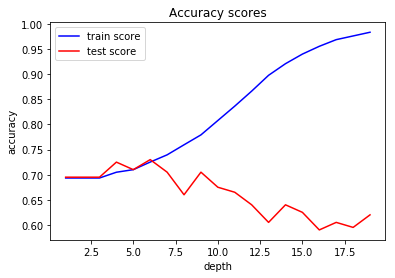

In [167]:
start_time1 = datetime.now()

# Define a set of reasonable values
depth_values = np.arange(1,20,1)

# Save accuracy on validation set
train_scores = []
test_scores = []

# Grid search
for depth in depth_values:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    dt.fit(X_train,y_train)
    
    # Accuracy
    accuracy_train = dt.score(X_train,y_train)
    accuracy_test = dt.score(X_test,y_test)
    
    
    # Save train accuracy
    train_scores.append({
        'depth': depth,
        'accuracy': accuracy_train
    })

    
    # Save test accuracy
    test_scores.append({
        'depth': depth,
        'accuracy': accuracy_test
    })


# Create DataFrame with train scores
train_scores_df = pd.DataFrame(train_scores)    
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)

end_time1 = datetime.now()

# Plot train and validation curve
plt.plot(train_scores_df['depth'],train_scores_df['accuracy'], color='blue',label='train score')
plt.plot(test_scores_df['depth'],test_scores_df['accuracy'], color='red',label='test score')
plt.title('Accuracy scores')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [168]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[0],
      ' with depth:',idx_max[1])

Top accuracy on test set: 0.73  with depth: 6.0


In [169]:
results_summary.append({
            '_model': 'Decision Tree',
            'accuracy': idx_max[0],
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_10000 = pd.DataFrame(results_summary)
accuracy_df_10000

,_model,accuracy,sample,time to run
0,Baseline,0.584874,10000,00:00:00.000052
1,SGD,0.630000,10000,00:00:00.007604
2,KNN,0.690000,10000,00:00:00.057443
3,Logistic Regression,0.690000,10000,00:00:00.392436
4,Decision Tree,0.730000,10000,00:00:00.863500


# Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Create a decision tree
rf_1 = RandomForestClassifier(
    n_estimators=1, max_depth=5 , random_state=0)

# Fit estimator
rf_1.fit(X_train, y_train)

# Get score
accuracy_rf_1 = rf_1.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_1))

Accuracy: 0.610


In [171]:
# Create a random forest estimator
rf_10 = RandomForestClassifier(
    n_estimators=10, max_depth=None , random_state=0)

# Fit estimator
rf_10.fit(X_train, y_train)

# Get score
accuracy_rf_10 = rf_10.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_10))

Accuracy: 0.655


In [172]:
# Create a large random forest estimator
rf_200 = RandomForestClassifier(
    n_estimators=200, max_depth=None , random_state=0)

# Fit estimator
rf_200.fit(X_train, y_train)

# Get score
accuracy_rf_200 = rf_200.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_200))

Accuracy: 0.715


In [173]:
# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('randomforest',RandomForestClassifier())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'randomforest__n_estimators':[1,10,100,1000],
    'randomforest__max_depth':[None],
    'randomforest__random_state':[0]
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', None), ('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
           ..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True)], 'randomforest__n_estimators': [1, 10, 100, 1000], 'randomforest__max_depth': [None], 'randomforest__random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [174]:
df = pd.DataFrame.from_items([
    ('n_estimators',grid_cv.cv_results_['param_randomforest__n_estimators']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,n_estimators,mean accuracy,standard deviation
3,1000,0.708375,0.009366
2,100,0.705000,0.007504
1,10,0.669500,0.006583
0,1,0.611500,0.009310


In [175]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.708375  (std: 0.009366099884811735 ) with alpha: 1000


In [176]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

accuracy = grid_cv.score(X_test,y_test)

print('Random Forest Classifier accuracy (test set):',accuracy)

Random Forest Classifier accuracy (test set): 0.73


In [177]:
start_time1 = datetime.now()
# Define a set of reasonable values
n_trees = np.arange(50,401,50)

# Save accuracy on test set

test_scores = []

# Grid search
for ensemble in n_trees:
    rf = RandomForestClassifier(n_estimators=ensemble, max_depth=None, random_state=0 )
    rf.fit(X_train,y_train)
    
    # Accuracy
    accuracy_test = rf.score(X_test,y_test)
    
    # Save validation accuracy
    test_scores.append({
        'n estimators': ensemble,
        'test accuracy': accuracy_test
    })
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)
end_time1 = datetime.now()

test_scores_df.head(10)

,n estimators,test accuracy
0,50,0.690
1,100,0.715
2,150,0.720
3,200,0.715
4,250,0.750
5,300,0.750
6,350,0.720
7,400,0.725


In [178]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['test accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[1],
      ' with n estimators:',idx_max[0])

Top accuracy on test set: 0.75  with n estimators: 250.0


In [179]:
# Fitting the tuned estimators on the entire train set
rf = RandomForestClassifier(n_estimators=int(idx_max[0]), max_depth=None, random_state=0 )
rf.fit(X_train,y_train)
accuracy_rf = rf.score(X_test, y_test)

In [180]:
results_summary.append({
            '_model': 'Random Forest',
            'accuracy': accuracy_rf,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_10000 = pd.DataFrame(results_summary)
accuracy_df_10000

,_model,accuracy,sample,time to run
0,Baseline,0.584874,10000,00:00:00.000052
1,SGD,0.630000,10000,00:00:00.007604
2,KNN,0.690000,10000,00:00:00.057443
3,Logistic Regression,0.690000,10000,00:00:00.392436
4,Decision Tree,0.730000,10000,00:00:00.863500
5,Random Forest,0.750000,10000,00:00:37.065603


# Summary with n=10000

In [181]:
accuracy_df_10000

,_model,accuracy,sample,time to run
0,Baseline,0.584874,10000,00:00:00.000052
1,SGD,0.630000,10000,00:00:00.007604
2,KNN,0.690000,10000,00:00:00.057443
3,Logistic Regression,0.690000,10000,00:00:00.392436
4,Decision Tree,0.730000,10000,00:00:00.863500
5,Random Forest,0.750000,10000,00:00:37.065603


# Sample with n=100000

# Sampling the data due to computing restraints (n = 100000)

In [182]:
n = 100000

In [183]:
priorall = prioralldata.sample(n)

In [184]:
pd.value_counts(priorall['reordered'], normalize = True)

1    0.59212
0    0.40788
Name: reordered, dtype: float64

In [185]:
X = priorall.drop('reordered', axis=1).values
y = priorall['reordered'].values

print('X shape:',X.shape)
print('y shape:', y.shape)

# Splitting the data
from sklearn.model_selection import train_test_split
from datetime import datetime

start_time1 = datetime.now()
# Due to computing constraints we have to reduce the data
#X_to_use, X_not_used, y_to_use, y_not_used = train_test_split(X, y,train_size=0.2,test_size=0.8)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2)

# checking the shapes
#print('X_to_use:', X_to_use.shape, X_to_use.dtype)
#print('y_to_use:', y_to_use.shape, y_to_use.dtype)
print('X_train:', X_train.shape, X_train.dtype)
print('y_train:', y_train.shape, y_train.dtype)
print('X_test:', X_test.shape, X_test.dtype)
print('y_test:', y_test.shape, y_test.dtype)

# Split again into validation/test sets

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    test_size=0.1, random_state=0
)

end_time1 = datetime.now()

print('Train:', X_train.shape, y_train.shape)
print('Validation:', X_valid.shape, y_valid.shape)
print('Test:', X_test.shape, y_test.shape)


print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))


X shape: (100000, 10)
y shape: (100000,)
X_train: (80000, 10) float64
y_train: (80000,) int64
X_test: (20000, 10) float64
y_test: (20000,) int64
Train: (80000, 10) (80000,)
Validation: (18000, 10) (18000,)
Test: (2000, 10) (2000,)

Time to run in seconds 0.086549



# Baseline

In [186]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class reorder(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.ones((len(X),1), dtype=bool)

start_time1 = datetime.now()
reorder_clf = reorder()
end_time1 = datetime.now()
print ('Accuracy: {:.3f}'.format(cross_val_score(reorder_clf, X_train, y_train, cv=3, scoring = 'accuracy').sum()/3))
print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))

Accuracy: 0.591

Time to run in seconds 7.2e-05



In [187]:
results_summary = []
results_summary.append({
            '_model': 'Baseline',
            'accuracy': cross_val_score(reorder_clf, X_train, y_train, cv=3, scoring = 'accuracy').sum()/3,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_100000 = pd.DataFrame(results_summary)

In [188]:
accuracy_df_100000

,_model,accuracy,sample,time to run
0,Baseline,0.5914,100000,00:00:00.000072


# Stochastic Gradient Classifier

In [189]:
from sklearn.linear_model import SGDClassifier

start_time1 = datetime.now()

# Create the estimator
sgd_clf = SGDClassifier(random_state=42)

# Fit the model to train data
sgd_clf.fit(X_train, y_train)

# Accuracy on test set
accuracy_sgd = sgd_clf.score(X_test, y_test)

end_time1 = datetime.now()
print('Accuracy: {:.3f}'.format(accuracy_sgd))
print('\nTime to run in seconds {}\n'.format((end_time1-start_time1).total_seconds()))

Accuracy: 0.419

Time to run in seconds 0.107132



In [190]:
results_summary.append({
            '_model': 'SGD',
            'accuracy': accuracy_sgd,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_100000 = pd.DataFrame(results_summary)
accuracy_df_100000

,_model,accuracy,sample,time to run
0,Baseline,0.5914,100000,00:00:00.000072
1,SGD,0.4195,100000,00:00:00.107132


# K-Nearest Neighbours

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the StandardScaler
scaler = StandardScaler()

# Create k-NN classifier
knn = KNeighborsClassifier(algorithm='brute')


# Create the pipeline
pipe = Pipeline([('scaler', scaler),
                 ('knn', knn)])


pipe.fit(X_train, y_train)

# Evaluate on validation set
accuracy_knn = pipe.score(X_test, y_test)

# Print accuracy
print('k-nearest neighbors accuracy: {:.3f}'.format(accuracy_knn))

k-nearest neighbors accuracy: 0.665


Tuning **k** and **distance metric (L1 and L2)** using Grid Search

In [192]:

# Define a set of reasonable values
k_values = np.arange(5, 105, 5)
distance_types = [1,2]

# Save accuracy on validation set
test_scores = []

# Grid search
for k in k_values:
    for d in distance_types:
        # Set hyperparameters
        pipe.set_params(knn__n_neighbors = k, knn__p = d)
        
        # Fit a k-NN classifier
        pipe.fit(X_train, y_train)
        
        # Evaluate on test set
        accuracy = pipe.score(X_test, y_test)
        
        # Save accuracy
        test_scores.append({
            'n neighbors': k,
            'distance metric': d,
            'test accuracy': accuracy
        })
        
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='test accuracy', ascending=False).head()

,distance metric,n neighbors,test accuracy
26,1,70,0.7095
24,1,65,0.7090
31,2,80,0.7090
30,1,80,0.7090
34,1,90,0.7085


In [193]:
start_time1 = datetime.now()

# tuned KNN model
pipe.set_params(knn__n_neighbors = 100, knn__p = 1)

# Fit a k-NN classifier
pipe.fit(X_train, y_train)

# Evaluate on test set
accuracy_knn = pipe.score(X_test, y_test)

end_time1 = datetime.now()
accuracy_knn

0.7045

In [194]:
results_summary.append({
            '_model': 'KNN',
            'accuracy': accuracy_knn,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_100000 = pd.DataFrame(results_summary)
accuracy_df_100000

,_model,accuracy,sample,time to run
0,Baseline,0.5914,100000,00:00:00.000072
1,SGD,0.4195,100000,00:00:00.107132
2,KNN,0.7045,100000,00:00:07.664451


# Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression

# Create the estimator
logreg = LogisticRegression()

# Fit the model to train data
logreg.fit(X_train, y_train)

# Accuracy on test set
accuracy_logreg = logreg.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_logreg))

Accuracy: 0.581


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

start_time1 = datetime.now()

# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('logreg',LogisticRegression())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'logreg__C':[0.0001,0.1,1000],
    'logreg__solver':['saga']
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

end_time1 = datetime.now()


In [197]:
df = pd.DataFrame.from_items([
    ('alpha',grid_cv.cv_results_['param_logreg__C']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,alpha,mean accuracy,standard deviation
1,0.1,0.696263,0.002639
2,1000,0.696250,0.002599
0,0.0001,0.640713,0.001376


In [198]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.6962625  (std: 0.0026393863433094946 ) with alpha: 0.1


In [199]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

accuracy_logreg = grid_cv.score(X_test,y_test)

print('Logistic regression accuracy (test set):',accuracy)

Logistic regression accuracy (test set): 0.7065


In [200]:
results_summary.append({
            '_model': 'Logistic Regression',
            'accuracy': accuracy_logreg,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_100000 = pd.DataFrame(results_summary)
accuracy_df_100000

,_model,accuracy,sample,time to run
0,Baseline,0.5914,100000,00:00:00.000072
1,SGD,0.4195,100000,00:00:00.107132
2,KNN,0.7045,100000,00:00:07.664451
3,Logistic Regression,0.6980,100000,00:00:04.432800


# Decision Tree

In [201]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)

# Fit the model to train data
dt.fit(X_train, y_train)

# Get score
accuracy_dt = dt.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt))

Accuracy: 0.707


In [202]:
# Increasing depth
dt_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# Fit the model to train data
dt_2.fit(X_train, y_train)

# Get score
accuracy_dt_2 = dt_2.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_2))

Accuracy: 0.707


In [203]:
# Increasing depth
dt_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model to train data
dt_3.fit(X_train, y_train)

# Get score
accuracy_dt_3 = dt_3.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_3))

Accuracy: 0.707


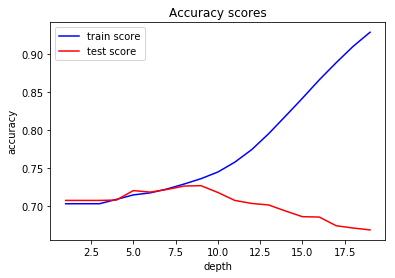

In [204]:
start_time1 = datetime.now()

# Define a set of reasonable values
depth_values = np.arange(1,20,1)

# Save accuracy on validation set
train_scores = []
test_scores = []

# Grid search
for depth in depth_values:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    dt.fit(X_train,y_train)
    
    # Accuracy
    accuracy_train = dt.score(X_train,y_train)
    accuracy_test = dt.score(X_test,y_test)
    
    
    # Save train accuracy
    train_scores.append({
        'depth': depth,
        'accuracy': accuracy_train
    })

    
    # Save test accuracy
    test_scores.append({
        'depth': depth,
        'accuracy': accuracy_test
    })


# Create DataFrame with train scores
train_scores_df = pd.DataFrame(train_scores)    
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)

end_time1 = datetime.now()

# Plot train and validation curve
plt.plot(train_scores_df['depth'],train_scores_df['accuracy'], color='blue',label='train score')
plt.plot(test_scores_df['depth'],test_scores_df['accuracy'], color='red',label='test score')
plt.title('Accuracy scores')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [205]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[0],
      ' with depth:',idx_max[1])

Top accuracy on test set: 0.7265  with depth: 9.0


In [206]:
results_summary.append({
            '_model': 'Decision Tree',
            'accuracy': idx_max[0],
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_100000 = pd.DataFrame(results_summary)
accuracy_df_100000

,_model,accuracy,sample,time to run
0,Baseline,0.5914,100000,00:00:00.000072
1,SGD,0.4195,100000,00:00:00.107132
2,KNN,0.7045,100000,00:00:07.664451
3,Logistic Regression,0.6980,100000,00:00:04.432800
4,Decision Tree,0.7265,100000,00:00:10.094575


# Random Forest

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Create a decision tree
rf_1 = RandomForestClassifier(
    n_estimators=1, max_depth=5 , random_state=0)

# Fit estimator
rf_1.fit(X_train, y_train)

# Get score
accuracy_rf_1 = rf_1.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_1))

Accuracy: 0.657


In [208]:
# Create a random forest estimator
rf_10 = RandomForestClassifier(
    n_estimators=10, max_depth=None , random_state=0)

# Fit estimator
rf_10.fit(X_train, y_train)

# Get score
accuracy_rf_10 = rf_10.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_10))

Accuracy: 0.703


In [209]:
# Create a large random forest estimator
rf_200 = RandomForestClassifier(
    n_estimators=200, max_depth=None , random_state=0)

# Fit estimator
rf_200.fit(X_train, y_train)

# Get score
accuracy_rf_200 = rf_200.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_200))

Accuracy: 0.717


In [210]:
# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('randomforest',RandomForestClassifier())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'randomforest__n_estimators':[1,10,100,1000],
    'randomforest__max_depth':[None],
    'randomforest__random_state':[0]
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', None), ('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
           ..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True)], 'randomforest__n_estimators': [1, 10, 100, 1000], 'randomforest__max_depth': [None], 'randomforest__random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [211]:
df = pd.DataFrame.from_items([
    ('n_estimators',grid_cv.cv_results_['param_randomforest__n_estimators']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,n_estimators,mean accuracy,standard deviation
3,1000,0.726038,0.001878
2,100,0.723287,0.002147
1,10,0.686400,0.001939
0,1,0.633262,0.002806


In [212]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.7260375  (std: 0.0018779593170036198 ) with alpha: 1000


In [213]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

accuracy = grid_cv.score(X_test,y_test)

print('Random Forest Classifier accuracy (test set):',accuracy)

Random Forest Classifier accuracy (test set): 0.7185


In [214]:
start_time1 = datetime.now()
# Define a set of reasonable values
n_trees = np.arange(50,401,50)

# Save accuracy on test set

test_scores = []

# Grid search
for ensemble in n_trees:
    rf = RandomForestClassifier(n_estimators=ensemble, max_depth=None, random_state=0 )
    rf.fit(X_train,y_train)
    
    # Accuracy
    accuracy_test = rf.score(X_test,y_test)
    
    # Save validation accuracy
    test_scores.append({
        'n estimators': ensemble,
        'test accuracy': accuracy_test
    })
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)
end_time1 = datetime.now()

test_scores_df.head(10)

,n estimators,test accuracy
0,50,0.7155
1,100,0.7190
2,150,0.7160
3,200,0.7170
4,250,0.7175
5,300,0.7195
6,350,0.7185
7,400,0.7220


In [215]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['test accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[1],
      ' with n estimators:',idx_max[0])

Top accuracy on test set: 0.722  with n estimators: 400.0


In [216]:
# Fitting the tuned estimators on the entire train set
rf = RandomForestClassifier(n_estimators=int(idx_max[0]), max_depth=None, random_state=0 )
rf.fit(X_train,y_train)
accuracy_rf = rf.score(X_test, y_test)

In [217]:
results_summary.append({
            '_model': 'Random Forest',
            'accuracy': accuracy_rf,
            'sample': n,
            'time to run': end_time1-start_time1
    
})
accuracy_df_100000 = pd.DataFrame(results_summary)
accuracy_df_100000

,_model,accuracy,sample,time to run
0,Baseline,0.5914,100000,00:00:00.000072
1,SGD,0.4195,100000,00:00:00.107132
2,KNN,0.7045,100000,00:00:07.664451
3,Logistic Regression,0.6980,100000,00:00:04.432800
4,Decision Tree,0.7265,100000,00:00:10.094575
5,Random Forest,0.7220,100000,00:06:59.754093


# Summary with n=10000

In [218]:
accuracy_df_100000

,_model,accuracy,sample,time to run
0,Baseline,0.5914,100000,00:00:00.000072
1,SGD,0.4195,100000,00:00:00.107132
2,KNN,0.7045,100000,00:00:07.664451
3,Logistic Regression,0.6980,100000,00:00:04.432800
4,Decision Tree,0.7265,100000,00:00:10.094575
5,Random Forest,0.7220,100000,00:06:59.754093


In [224]:
accuracy_df_all = pd.concat([accuracy_df_1000, accuracy_df_10000, accuracy_df_100000], ignore_index=True)
accuracy_df_all

,_model,accuracy,sample,time to run
0,Baseline,0.614997,1000,00:00:00.000140
1,SGD,0.200000,1000,00:00:00.010032
2,KNN,0.750000,1000,00:00:00.006132
3,Logistic Regression,0.750000,1000,00:00:00.108472
4,Decision Tree,0.850000,1000,00:00:00.107971
5,Random Forest,0.750000,1000,00:00:04.798598
6,Baseline,0.584874,10000,00:00:00.000052
7,SGD,0.630000,10000,00:00:00.007604
8,KNN,0.690000,10000,00:00:00.057443
9,Logistic Regression,0.690000,10000,00:00:00.392436


# Using all available data with batched data

# Neural Networks with Tensor Flow

In [1]:
prioralldata.shape

NameError: name 'prioralldata' is not defined

In [226]:
X = prioralldata.drop('reordered', axis=1).values
y = prioralldata['reordered'].values

print('X shape:',X.shape)
print('y shape:', y.shape)

# Splitting the data
from sklearn.model_selection import train_test_split
from datetime import datetime

start_time2 = datetime.now()
# Due to computing constraints we have to reduce the data
#X_to_use, X_not_used, y_to_use, y_not_used = train_test_split(X, y,train_size=0.2,test_size=0.8)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2)

# checking the shapes
#print('X_to_use:', X_to_use.shape, X_to_use.dtype)
#print('y_to_use:', y_to_use.shape, y_to_use.dtype)
print('X_train:', X_train.shape, X_train.dtype)
print('y_train:', y_train.shape, y_train.dtype)
print('X_test:', X_test.shape, X_test.dtype)
print('y_test:', y_test.shape, y_test.dtype)

# Split again into validation/test sets

start_time3 = datetime.now()
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    test_size=0.1, random_state=0
)

end_time2 = datetime.now()

print('Train:', X_train.shape, y_train.shape)
print('Validation:', X_valid.shape, y_valid.shape)
print('Test:', X_test.shape, y_test.shape)


print('\nTime to run in seconds {}\n'.format((end_time2-start_time2).total_seconds()))


X shape: (32434489, 10)
y shape: (32434489,)
X_train: (25947591, 10) float64
y_train: (25947591,) int64
X_test: (6486898, 10) float64
y_test: (6486898,) int64
Train: (25947591, 10) (25947591,)
Validation: (5838208, 10) (5838208,)
Test: (648690, 10) (648690,)

Time to run in seconds 408.998689



In [227]:
import tensorflow as tf

# Create placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, 10])
y = tf.placeholder(dtype=tf.int32, shape=[None])

# Create variables
W = tf.Variable(initial_value=tf.zeros(shape=[10, 2]))
b = tf.Variable(initial_value=tf.zeros(shape=[2]))

# Compute logits
logits = tf.matmul(X, W) + b
print(logits.shape)

# Cross-entropy loss function (without one-hot encoding)
ce = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=y, logits=logits)
print(ce.shape)

# Mean cross-entropy
mean_ce = tf.reduce_mean(ce)
print(mean_ce.shape)

# Gradient descent
lr = tf.placeholder(dtype=tf.float32, shape=[])
gd = tf.train.GradientDescentOptimizer(
    learning_rate=lr)

# Minimize cross-entropy
train_op = gd.minimize(mean_ce)

# Compute predictions
predictions = tf.argmax(
    logits, # shape: (n, 10)
    axis=1, # class with max logit
    output_type=tf.int32 # Same type as labels
)
print(predictions.shape)

# Are the predictions correct?
is_correct = tf.equal(y, predictions)
print(is_correct.shape)

# Accuracy
accuracy = tf.reduce_mean(
    # Convert booleans (false/true) to 0/1 float numbers
    tf.cast(is_correct, dtype=tf.float32)
)
print(accuracy.shape)

(?, 2)
(?,)
()
(?,)
(?,)
()


In [228]:
# Function to get batches of data
def get_batches(X, y, batch_size):
    # Enumerate indexes by steps of batch_size
    # i: 0, b, 2b, 3b, 4b, .. where b is the batch size
    for i in range(0, len(y), batch_size):
        # "yield" data between index i and i+b (not included)
        yield X[i:i+batch_size], y[i:i+batch_size]

get_batches(X_train, y_train, 10000)

<generator object get_batches at 0x1bdcf9fb48>

In [229]:
# Use generator in a "for" loop
start_time4 = datetime.now()

for X_batch, y_batch in get_batches(X_train, y_train, 10000):
    print('Batch X/y:', X_batch.shape, y_batch.shape)
    
end_time4 = datetime.now()
print('\nTime to run in seconds {}\n'.format((end_time4-start_time4).total_seconds()))

Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/

Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/

Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/

Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/

Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/

Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/

Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/y: (10000, 10) (10000,)
Batch X/

In [230]:
# Accuracy score after each batch of data
acc_values = []

# Initialization operation
initialization_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Get batches of data
    for X_batch, y_batch in get_batches(X_train, y_train, 10000):
        # Run training and evaluate accuracy
        _, batch_acc = sess.run([train_op, accuracy], feed_dict={
            X: X_batch,
            y: y_batch,
            lr: 0.1 # learning rate
        })
        acc_values.append(batch_acc)

    # Get weight matrix and biases
    W_fitted = W.eval()
    b_fitted = b.eval()
    # .. which is equivalent to
    W_fitted, b_fitted = sess.run([W, b])

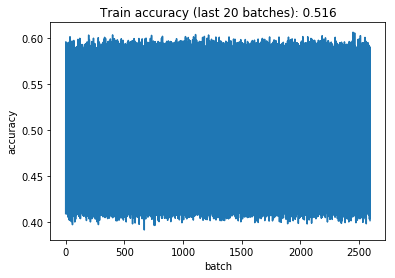

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot accuracy values
plt.plot(acc_values)
plt.title('Train accuracy (last 20 batches): {:.3f}'.format(
    # Average accuracy value
    np.mean(acc_values[-2595:])
))
plt.xlabel('batch')
plt.ylabel('accuracy')
plt.show()